In [2]:
# from td_utils import load_raw_audio
from mix_audio import create_training_data
from utils import make_dir

import os
import numpy as np
from tqdm import tqdm
import IPython
import matplotlib.pyplot as plt

from pydub import AudioSegment

In [3]:
version = 'train' # 데이터 만들때마다 바꾸기

In [4]:
make_dir('./data/{}_audios'.format(version))
make_dir('./data/XY_{}'.format(version))

In [5]:
def load_raw_audio(audio_dir):
    # print(audio_dir)
    activates = []
    backgrounds = []
    negatives = []
    # print(os.listdir(audio_dir))
    for filename in os.listdir(os.path.join(audio_dir,'activate')):
        if filename.endswith("wav"):
            activate = AudioSegment.from_wav(os.path.join(audio_dir,'activate',filename))
            activates.append(activate)
    for filename in os.listdir(os.path.join(audio_dir,'background')):
        if filename.endswith("wav"):
            background = AudioSegment.from_wav(os.path.join(audio_dir,'background',filename))
            backgrounds.append(background)
    for filename in os.listdir(os.path.join(audio_dir,'negative')):
        if filename.endswith("wav"):
            negative = AudioSegment.from_wav(os.path.join(audio_dir,'negative',filename))
            negatives.append(negative)
    return activates, negatives, backgrounds

In [6]:
if version == 'train':
    audio_dir = os.path.join('.', 'data', 'audio_label_clip')
else:
    audio_dir = os.path.join('.', 'data', 'audio_label_clip_for_test')

activates, negatives, backgrounds = load_raw_audio(audio_dir)
print(activates)
num_of_data = 10

if len(backgrounds) == 0:
    print("background가 없습니다.")
else:
    for i in tqdm(range(num_of_data)):
        j = np.random.randint(0, len(backgrounds))
        background = backgrounds[j]
        x,x_minus, y = create_training_data(background, 
                                    activates, 
                                    negatives, 
                                    filename='./data/{}_audios/mix_{}.wav'.format(version, i))
        x = np.transpose(x)
        y = np.transpose(y)
        np.save('./data/XY_{}/x_{}'.format(version, i), x)
        np.save('./data/XY_{}/y_{}'.format(version, i), y)

[<pydub.audio_segment.AudioSegment object at 0x00000199244F3E20>, <pydub.audio_segment.AudioSegment object at 0x00000199244F3D00>, <pydub.audio_segment.AudioSegment object at 0x00000199244F3940>, <pydub.audio_segment.AudioSegment object at 0x00000199244F3CD0>, <pydub.audio_segment.AudioSegment object at 0x000001993BA8BD90>, <pydub.audio_segment.AudioSegment object at 0x00000199244F1420>, <pydub.audio_segment.AudioSegment object at 0x00000199244F3FD0>, <pydub.audio_segment.AudioSegment object at 0x00000199244F3F40>, <pydub.audio_segment.AudioSegment object at 0x000001995503E590>, <pydub.audio_segment.AudioSegment object at 0x000001995503FC40>, <pydub.audio_segment.AudioSegment object at 0x000001995503FCA0>, <pydub.audio_segment.AudioSegment object at 0x000001995503EE30>, <pydub.audio_segment.AudioSegment object at 0x000001995503D4B0>, <pydub.audio_segment.AudioSegment object at 0x000001995503ED40>, <pydub.audio_segment.AudioSegment object at 0x000001995503F940>, <pydub.audio_segment.Aud

  0%|          | 0/10 [00:04<?, ?it/s]


OSError: Failed to open file b'C:\\Users\\\xec\x9d\xb4\xec\x98\x81\xec\x9a\xb0\\AppData\\Local\\Temp\\scipy-r93oa1j8'

: 

In [7]:
print(x.shape, y.shape)

(862, 128) (212, 1)


In [8]:
IPython.display.Audio("./data/{}_audios/mix_{}.wav".format(version, num_of_data-1))

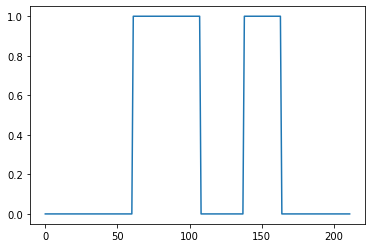

In [9]:
plt.plot(np.load('./data/XY_{}/y_{}.npy'.format(version, num_of_data-1)))